THIS PROJECT IS TO DETECT CREDIT CARD FRAUD USING ML ALGORITHMS i.e ISOLATION FOREST ALGORITHM AND LOCAL OUTLIER FACTOR ALGORITHM


IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import sklearn

LOAD FILE

In [2]:
path=r"C:\Users\Ayush Tripathi\Desktop\creditcard.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


DATA PRE-PROCESSING

In [5]:
print(df.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
df.shape

(284807, 31)

In [18]:
data = df.sample(frac=0.05,random_state=1)

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [20]:
print(data.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [21]:
data.shape

(14240, 31)

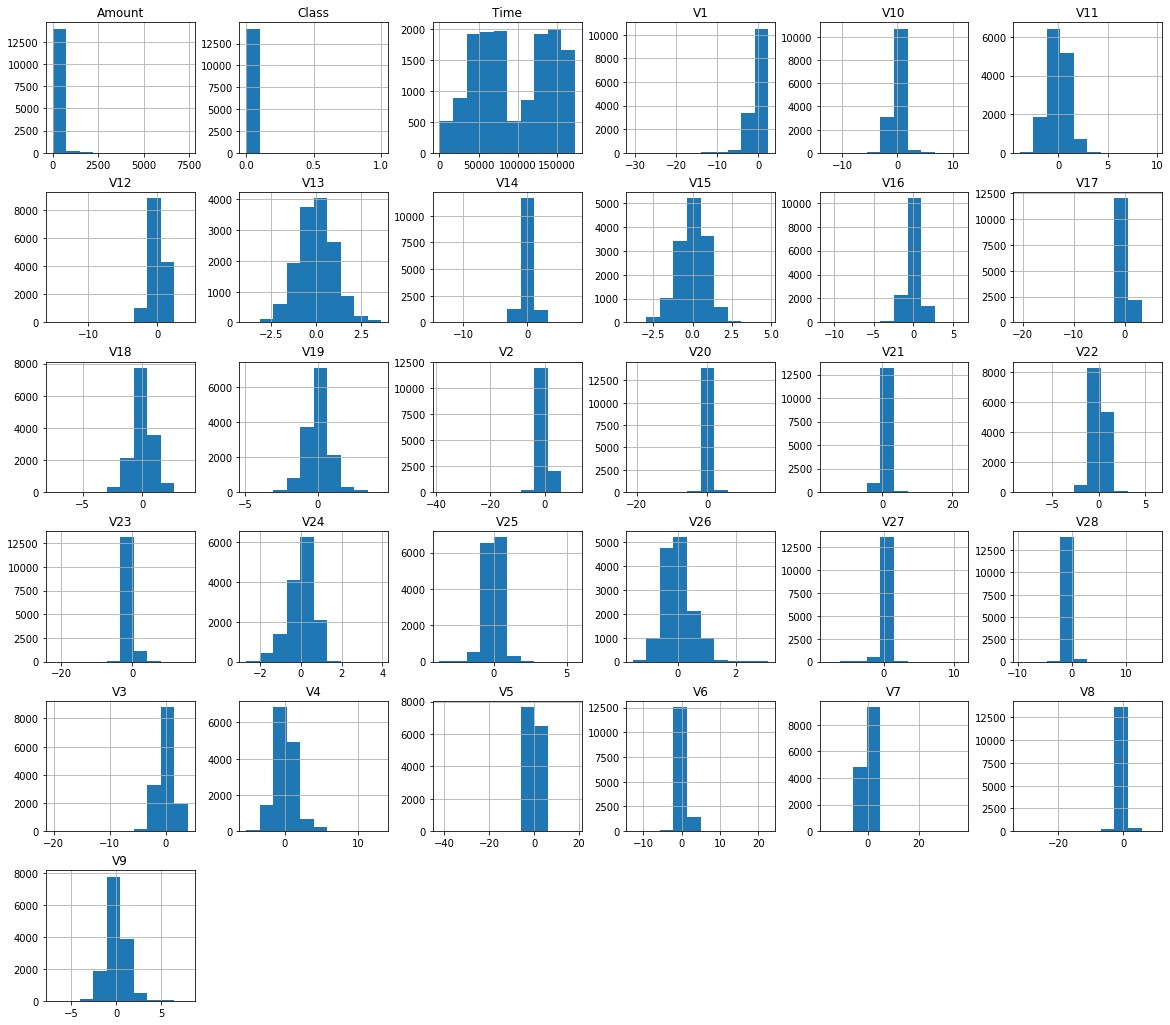

In [29]:
data.hist(figsize=(20,18))
plt.show()

In [32]:
fraud=data[data['Class']==1]

In [33]:
valid=data[data['Class']==0]

In [34]:
outlier_fraction=len(fraud) / len(valid)

In [35]:
outlier_fraction

0.0014064697609001407

In [38]:
print("Fraud:{}".format(len(fraud)))
print("Valid:{}".format(len(valid)))

Fraud:20
Valid:14220


In [40]:
cormat = data.corr(method='pearson')

In [44]:
cormat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.131923,-0.000883,-0.420543,-0.104234,0.179081,-0.066359,0.075723,-0.031901,-0.010428,...,0.028310,0.141396,0.049765,-0.015818,-0.231025,-0.049046,-0.003300,0.004292,-0.032936,0.001807
V1,0.131923,1.000000,0.071753,-0.028260,-0.015140,-0.005668,-0.012817,-0.037422,0.048410,-0.004608,...,0.001126,-0.005051,-0.018080,-0.003236,-0.003809,0.009087,-0.018414,0.117443,-0.257165,-0.053886
V2,-0.000883,0.071753,1.000000,0.039910,-0.024396,0.005447,0.021843,0.009120,-0.039539,-0.005968,...,0.016396,0.004592,-0.053695,-0.017348,-0.045579,-0.009323,-0.032187,0.135688,-0.525934,0.042073
V3,-0.420543,-0.028260,0.039910,1.000000,0.011516,-0.005312,-0.013616,-0.072331,0.025426,-0.012851,...,0.025232,0.002265,0.013701,-0.002312,-0.002433,0.005690,-0.048198,0.055551,-0.227040,-0.121327
V4,-0.104234,-0.015140,-0.024396,0.011516,1.000000,0.011226,0.008215,0.013072,0.005391,0.000182,...,-0.024768,0.000794,0.024265,0.008532,0.002012,0.004232,0.029732,-0.039478,0.099250,0.093901
V5,0.179081,-0.005668,0.005447,-0.005312,0.011226,1.000000,-0.073985,-0.116858,0.018585,-0.011741,...,0.042127,0.000489,0.050805,-0.013923,-0.006013,-0.015121,-0.092722,0.038490,-0.449572,-0.044085
V6,-0.066359,-0.012817,0.021843,-0.013616,0.008215,-0.073985,1.000000,0.035681,-0.027643,-0.003680,...,-0.010168,0.002460,-0.032122,-0.009494,-0.003432,0.011645,0.029203,-0.019585,0.256937,-0.025933
V7,0.075723,-0.037422,0.009120,-0.072331,0.013072,-0.116858,0.035681,1.000000,0.046405,-0.006887,...,-0.023335,-0.001399,-0.042976,0.005308,0.017436,0.002155,0.040840,-0.075450,0.458111,-0.083166
V8,-0.031901,0.048410,-0.039539,0.025426,0.005391,0.018585,-0.027643,0.046405,1.000000,-0.010473,...,0.002051,-0.000190,-0.014385,0.001594,0.014975,0.011207,0.011222,0.025823,-0.091972,-0.004997
V9,-0.010428,-0.004608,-0.005968,-0.012851,0.000182,-0.011741,-0.003680,-0.006887,-0.010473,1.000000,...,0.024168,-0.007983,-0.003122,0.017384,-0.006869,0.005785,-0.041325,-0.021631,-0.037045,-0.068771


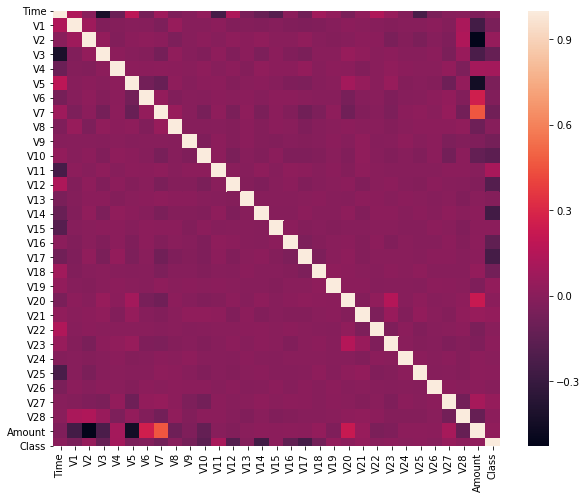

In [54]:
plt.subplots(figsize=(10,8))
sns.heatmap(cormat)

In [59]:
x=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [61]:
x.shape

(14240, 30)

In [89]:
y=data['Class']

In [90]:
y.shape

(14240,)

MODELLING

In [91]:
from sklearn.metrics import classification_report,accuracy_score

In [92]:
from sklearn.ensemble import IsolationForest

In [93]:
from sklearn.neighbors import LocalOutlierFactor

In [142]:
classifier = {"Isolation Forest":IsolationForest(max_samples=len(x),contamination=outlier_fraction,random_state=1,behaviour="new"),
                  "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)}                     

In [145]:
for i, (clf_name,clf) in enumerate(classifier.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
    else:
        y_pred=clf.fit_predict(x)
        
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
        
    n_error = (y_pred!=y).sum()
        
    print("{}:{} ".format(clf_name,n_error))
    print("Accuracy Score is:",accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest:35 
Accuracy Score is: 0.9975421348314607
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14220
           1       0.14      0.15      0.15        20

    accuracy                           1.00     14240
   macro avg       0.57      0.57      0.57     14240
weighted avg       1.00      1.00      1.00     14240

Local Outlier Factor:41 
Accuracy Score is: 0.997120786516854
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14220
           1       0.00      0.00      0.00        20

    accuracy                           1.00     14240
   macro avg       0.50      0.50      0.50     14240
weighted avg       1.00      1.00      1.00     14240

